# objective

The objective of this project is to build a high-performing model for automated sentiment classification of Amazon reviews into positive or negative categories.

# Abstract

In this project,
- We explored the data initially to ensure balanced dataset, comprising equal positive and negative reviews, and gained insights into review lengths.

- We preprocessed a sample of 10,000 reviews by removing special characters, digits, punctuation, and stop words, converting the text to lowercase.

- We performed feature engineering, generating numerical features using CountVectorizer for effective modeling.

- We delved into the model section, experimenting with various algorithms such as Naive Bayes, SVM, Logistic Regression, Gradient Boosting Classifier, and the Transformer-based model BERT.

- We compared model performance using ROC-AUC score and accuracy, allowing us to determine the most suitable model for sentiment analysis on Amazon reviews.

- Our findings provide valuable guidance in selecting an optimal model for similar sentiment analysis tasks.






# Importin & Inspecting Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(42)

In [4]:
!pip install kaggle

In [5]:
!mkdir ~/.kaggle

In [6]:
!cp /content/drive/MyDrive/kaggle_1.json ~/.kaggle/kaggle.json

In [7]:
!chmod 600 ~/.kaggle/kaggle_1.json

chmod: cannot access '/root/.kaggle/kaggle_1.json': No such file or directory


In [8]:
!kaggle datasets download -d kritanjalijain/amazon-reviews

100% 1.29G/1.29G [01:10<00:00, 17.1MB/s]
100% 1.29G/1.29G [01:10<00:00, 19.8MB/s]


In [9]:
!unzip amazon-reviews

Archive:  amazon-reviews.zip
  inflating: amazon_review_polarity_csv.tgz  
  inflating: test.csv                
  inflating: train.csv               


In [10]:
custom_headers = ["reviews_polarity","Title","text"]

In [11]:
data = pd.read_csv('train.csv', header=None, names=custom_headers)


In [12]:
test=pd.read_csv('test.csv', header=None, names=custom_headers)

In [13]:
data.head()

,reviews_polarity,Title,text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [14]:
test.head()

,reviews_polarity,Title,text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [15]:
data['reviews_polarity'].unique()

array([2, 1])

In [16]:
data.shape[0]

3600000

In [17]:
data['reviews_polarity']=data['reviews_polarity'].apply(lambda x : int(0) if x==1 else int(1))


In [18]:
test['reviews_polarity']=test['reviews_polarity'].apply(lambda x : int(0) if x==1 else int(1))

In [19]:
data.head()

,reviews_polarity,Title,text
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,1,Amazing!,This soundtrack is my favorite music of all ti...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   reviews_polarity  int64 
 1   Title             object
 2   text              object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [21]:
data.duplicated().sum()

0

In [22]:
data['text'].isna().sum()

0

In [23]:
data['Title'].isna().sum()

77

In [24]:
data.dropna(subset=['Title'], inplace=True)

In [25]:
data['Title'].isna().sum()

0

In [26]:
data.shape[0]

3599923

In [27]:
data.reset_index(drop=True, inplace=True)


# Exploring Data

In [28]:
data['reviews_polarity'].value_counts()

1    1799965
0    1799958
Name: reviews_polarity, dtype: int64

In [29]:
data['len_title']=data['Title'].apply(len)

In [30]:
data['len_text']=data['text'].apply(len)

In [31]:
data.loc[data['len_text'].idxmax()][2]

"I'm sorry to say this, but TLC really let themselves down with this one. There is hardly any Left Eye, and most of the songs are just some standard R&B garbage (not to say I don't like some standard R&B garbage, but I'm expecting something a little different from TLC). It's nice that Chilli had some more lead singing, but most of the songs it seemed like hardly anyone from the group was there except the lead one singing. Basically, this CD is boring. That's the basic thing. Yes, No Scrubs and Unpretty are good, but really that's about all. Some, like Come On Down, are sort of pretty to listen to for a while, but they are not enough to hold the whole thing up. TLC's first two albums were awesome, and I can't help but agree with Left Eye's disagreements with the group. They started out great, so wwhy did they want to regress to mediocre? They don't even sound like a group anymore on this CD. I hope they get it together better next time. Well, that's it for this diatribe. Buy something e

In [32]:
data['reviews_polarity'].isna().sum()

0

# Pre-processing

In [33]:
data['Title'][15]

"Don't try to fool us with fake reviews."

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
import nltk  #Natural language tool kit

In [36]:
from nltk.corpus import stopwords

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
# s = sentence
s=data['Title'][15]
s

"Don't try to fool us with fake reviews."

In [40]:
import re
s=re.sub('[^a-zA-Z]'," ",s)
s

'Don t try to fool us with fake reviews '

In [41]:
s=s.lower()
s

'don t try to fool us with fake reviews '

In [42]:
s=s.split()
s

['don', 't', 'try', 'to', 'fool', 'us', 'with', 'fake', 'reviews']

In [43]:
# remove the stop words
temp=[ temp for temp in s if temp not in stopwords.words('english') ]
temp

['try', 'fool', 'us', 'fake', 'reviews']

In [44]:
s= ' '.join(temp)
s

'try fool us fake reviews'

In [45]:
from nltk.stem import PorterStemmer

In [46]:
ps=PorterStemmer()

In [47]:
s= ps.stem(s)             #simplify words
s

'try fool us fake review'

In [48]:
#transform text to vector

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
cv = CountVectorizer()        # function to transform text to vector

In [51]:
cv.fit_transform(s.split()).toarray()

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [52]:
# Get a Sample

In [53]:
sample=data.iloc[:10000,:]

In [54]:
sample.head()

,reviews_polarity,Title,text,len_title,len_text
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,30,394
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,37,470
2,1,Amazing!,This soundtrack is my favorite music of all ti...,8,750
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,20,721
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",54,425


In [131]:
#Putting all together
corpus=[]

for i in tqdm(range(len(sample))):

    s=re.sub('[^a-zA-Z]'," ",data['text'][i])
    s= s.lower()
    s=s.split()
    s= [word for word in s if word not in stopwords.words('english')]
    s=" ".join(s)
    s= ps.stem(s)
    corpus.append(s)


100%|██████████| 10000/10000 [01:42<00:00, 97.41it/s]


In [56]:
cv = CountVectorizer()        # function to transform text to vector

In [57]:
X = cv.fit_transform(corpus).toarray()


In [58]:
y = sample['reviews_polarity']

In [59]:
# Split the data into train and test

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training & Building

In [62]:
import joblib

## Naive Bayes


### MultinomialNB

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
clf_multinomial = MultinomialNB()

In [65]:
clf_multinomial.fit(X_train,y_train)

MultinomialNB()

### MultinomialNB Prediction


In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report , roc_auc_score

In [64]:
clf_multinomial=joblib.load("/content/drive/MyDrive/nlp_amazon_reviews_multinominalNB.pkl")

In [65]:
pred_multinomial= clf_multinomial.predict(X_test)

In [66]:
accuracy_multinominal=accuracy_score(pred_multinomial,y_test)
accuracy_multinominal

0.8055

In [67]:
roc_multinominal=roc_auc_score(pred_multinomial,y_test)
roc_multinominal

0.8067171717171717

In [68]:
print(confusion_matrix(pred_multinomial,y_test))

[[874 226]
 [163 737]]


In [69]:
print(classification_report(pred_multinomial,y_test))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1100
           1       0.77      0.82      0.79       900

    accuracy                           0.81      2000
   macro avg       0.80      0.81      0.80      2000
weighted avg       0.81      0.81      0.81      2000



### GaussianNB


In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
clf_gaussian = GaussianNB()

In [74]:
clf_gaussian.fit(X_train,y_train)

GaussianNB()

### GaussianNB Prediction

In [70]:
clf_gaussian=joblib.load("/content/drive/MyDrive/nlp_amazon_reviews_gaussianNB.pkl")

In [71]:
pred_gaussian= clf_gaussian.predict(X_test)

In [72]:
accuracy_gaussian=accuracy_score(pred_gaussian,y_test)
accuracy_gaussian

0.619

In [73]:
roc_gaussian=roc_auc_score(pred_gaussian,y_test)
roc_gaussian

0.6315413105379597

In [74]:
print(confusion_matrix(pred_gaussian,y_test))

[[831 556]
 [206 407]]


In [75]:
print(classification_report(pred_gaussian,y_test))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69      1387
           1       0.42      0.66      0.52       613

    accuracy                           0.62      2000
   macro avg       0.61      0.63      0.60      2000
weighted avg       0.69      0.62      0.63      2000



### Model Deployment

In [80]:
joblib.dump(clf_multinomial,'/content/drive/MyDrive/nlp_amazon_reviews_multinominalNB.pkl')

['/content/drive/MyDrive/nlp_amazon_reviews_multinominalNB.pkl']

In [81]:
joblib.dump(clf_gaussian,'/content/drive/MyDrive/nlp_amazon_reviews_gaussianNB.pkl')

['/content/drive/MyDrive/nlp_amazon_reviews_gaussianNB.pkl']

## SVM


In [82]:
from sklearn.svm import SVC


In [83]:
# Define the SVM model
svm_model = SVC(verbose=True)

In [84]:
svm_model.fit(X_train, y_train)

[LibSVM]

SVC(verbose=True)

### SVM Evaluation

In [76]:
svm_model=joblib.load("/content/drive/MyDrive/nlp_amazon_reviews_svm.pkl")

In [77]:
svm_pred= svm_model.predict(X_test)

In [78]:
accuracy_svm=accuracy_score(svm_pred,y_test)
accuracy_svm

0.8165

In [79]:
roc_svm=roc_auc_score(svm_pred,y_test)
roc_svm

0.8164564072932717

In [80]:
print(confusion_matrix(svm_pred,y_test))

[[863 193]
 [174 770]]


In [81]:
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1056
           1       0.80      0.82      0.81       944

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



### Model Deployment

In [91]:
joblib.dump(svm_model,'/content/drive/MyDrive/nlp_amazon_reviews_svm.pkl')

['/content/drive/MyDrive/nlp_amazon_reviews_svm.pkl']

## Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



In [93]:
# Define the Logistic Regression model
lr_model = LogisticRegression()


In [94]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],           # Inverse of regularization strength (smaller values for stronger regularization)
    'penalty': ['l1', 'l2'],     # Regularization penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
    'solver': ['liblinear',"lbfgs"]      # Solver for optimization ('liblinear' for small datasets or 'lbfgs' for multiclass problems)
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy')



In [ ]:
grid_search.fit(X_train, y_train)


In [95]:
best_lr_model=LogisticRegression(C=0.1)


In [99]:
best_lr_model.fit(X_train, y_train)


LogisticRegression(C=0.1)

### Logistic Regression Evaluation

In [82]:
best_lr_model=joblib.load("/content/drive/MyDrive/nlp_amazon_reviews_logistic_regression.pkl")

In [83]:
# Evaluate the best model on the test data
accuracy = best_lr_model.score(X_test, y_test)
print("Best Logistic Regression Model Accuracy:", accuracy)

Best Logistic Regression Model Accuracy: 0.819


In [84]:
lr_pred= best_lr_model.predict(X_test)

In [85]:
accuracy_lr=accuracy_score(lr_pred,y_test)
accuracy_lr

0.819

In [86]:
roc_lr=roc_auc_score(lr_pred,y_test)
roc_lr

0.8187315532362717

In [87]:
print(confusion_matrix(lr_pred,y_test))

[[852 177]
 [185 786]]


In [88]:
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1029
           1       0.82      0.81      0.81       971

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



### Model Deployment


In [106]:
joblib.dump(best_lr_model,'/content/drive/MyDrive/nlp_amazon_reviews_logistic_regression.pkl')

['/content/drive/MyDrive/nlp_amazon_reviews_logistic_regression.pkl']

## GradientBoostingClassifier


In [107]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV



In [108]:
# Define the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()


In [109]:
gb_model.fit(X_train, y_train)


GradientBoostingClassifier()

### GradientBoostingClassifier Evaluation

In [89]:
gb_model=joblib.load("/content/drive/MyDrive/nlp_amazon_reviews_GradientBoostingClassifier.pkl")

In [90]:
# Evaluate the best model on the test data
accuracy = gb_model.score(X_test, y_test)
print("Best Gradient Boosting Classifier Model Accuracy:", accuracy)


Best Gradient Boosting Classifier Model Accuracy: 0.7535


In [91]:
gb_pred= gb_model.predict(X_test)

In [92]:
accuracy_gb=accuracy_score(gb_pred,y_test)
accuracy_gb

0.7535

In [93]:
roc_gb=roc_auc_score(gb_pred,y_test)
roc_gb

0.7532790306591374

In [94]:
print(confusion_matrix(gb_pred,y_test))

[[801 257]
 [236 706]]


In [95]:
print(classification_report(gb_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1058
           1       0.73      0.75      0.74       942

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



### Model Deployment


In [116]:
joblib.dump(gb_model,'/content/drive/MyDrive/nlp_amazon_reviews_GradientBoostingClassifier.pkl')

['/content/drive/MyDrive/nlp_amazon_reviews_GradientBoostingClassifier.pkl']

## BERT


In [96]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.1 MB/s eta 0:00:00


In [97]:
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


In [98]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')



All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [99]:
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=42)


In [100]:
# Tokenize input sequences
max_length = 128  # Set the maximum token length for padding/truncation
X_train_encoded = tokenizer(list(X_train), padding=True, truncation=True, return_tensors='tf', max_length=max_length)
X_test_encoded = tokenizer(list(X_test), padding=True, truncation=True, return_tensors='tf', max_length=max_length)

# Extract input tensors from the BatchEncoding object
X_train_input = {key: X_train_encoded[key] for key in X_train_encoded}
X_test_input = {key: X_test_encoded[key] for key in X_test_encoded}

In [101]:
# Train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [102]:
path_acc=f"/content/drive/MyDrive/best_weight_acc_nlp_bert_amazon_reviews.h5"
path_loss=f"/content/drive/MyDrive/best_weight_loss_nlp_bert_amazon_reviews.h5"
Checkpoint_acc = ModelCheckpoint(
    filepath=path_acc,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=True,
    verbose=1)
Checkpoint_loss = ModelCheckpoint(
    filepath=path_loss,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1)

In [130]:
model.fit(X_train_input, y_train, batch_size=32, epochs=20, validation_split=0.1,
          callbacks=[Checkpoint_acc,Checkpoint_loss])



Epoch 1/20
225/225 [==============================] - ETA: 0s - loss: 0.4481 - accuracy: 0.7868
Epoch 1: val_accuracy improved from -inf to 0.82750, saving model to /content/drive/MyDrive/best_weight_acc_nlp_bert_amazon_reviews.h5

Epoch 1: val_loss improved from inf to 0.38400, saving model to /content/drive/MyDrive/best_weight_loss_nlp_bert_amazon_reviews.h5
225/225 [==============================] - 293s 975ms/step - loss: 0.4481 - accuracy: 0.7868 - val_loss: 0.3840 - val_accuracy: 0.8275
Epoch 2/20
225/225 [==============================] - ETA: 0s - loss: 0.2569 - accuracy: 0.9035
Epoch 2: val_accuracy improved from 0.82750 to 0.85000, saving model to /content/drive/MyDrive/best_weight_acc_nlp_bert_amazon_reviews.h5

Epoch 2: val_loss improved from 0.38400 to 0.36272, saving model to /content/drive/MyDrive/best_weight_loss_nlp_bert_amazon_reviews.h5
225/225 [==============================] - 208s 927ms/step - loss: 0.2569 - accuracy: 0.9035 - val_loss: 0.3627 - val_accuracy: 0.85

In [131]:
model.save_weights('/content/drive/MyDrive/stop_weight_nlp_bert_amazon_reviews.h5')

### BERT Evaluation


#### Stop weight

In [126]:
model.load_weights('/content/drive/MyDrive/stop_weight_nlp_bert_amazon_reviews.h5')

In [127]:
y_pred_logits = model.predict(X_test_input).logits
y_pred_probs = tf.nn.softmax(y_pred_logits, axis=-1)
y_pred_labels = tf.argmax(y_pred_probs, axis=-1).numpy()

63/63 [==============================] - 18s 283ms/step


In [105]:
accuracy_bert=accuracy_score(y_pred_labels,y_test)
accuracy_bert

0.8615

In [106]:
roc_bert=roc_auc_score(y_pred_labels,y_test)
roc_bert

0.8643907771814747

In [107]:
print(confusion_matrix(y_pred_labels,y_test))

[[939 179]
 [ 98 784]]


In [108]:
print(classification_report(y_pred_labels,y_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1118
           1       0.81      0.89      0.85       882

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



#### Best accuracy weight

In [109]:
model.load_weights(path_acc)

In [110]:
y_pred_logits = model.predict(X_test_input).logits
y_pred_probs = tf.nn.softmax(y_pred_logits, axis=-1)
y_pred_labels = tf.argmax(y_pred_probs, axis=-1).numpy()

63/63 [==============================] - 17s 264ms/step


In [111]:
accuracy_bert_best_acc=accuracy_score(y_pred_labels,y_test)
accuracy_bert_best_acc

0.8575

In [112]:
roc_bert_best_acc=roc_auc_score(y_pred_labels,y_test)
roc_bert_best_acc

0.8595792322536014

In [113]:
print(confusion_matrix(y_pred_labels,y_test))

[[929 177]
 [108 786]]


In [114]:
print(classification_report(y_pred_labels,y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1106
           1       0.82      0.88      0.85       894

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



#### Best Loss

In [115]:
model.load_weights(path_loss)

In [116]:
y_pred_logits = model.predict(X_test_input).logits
y_pred_probs = tf.nn.softmax(y_pred_logits, axis=-1)
y_pred_labels = tf.argmax(y_pred_probs, axis=-1).numpy()

63/63 [==============================] - 17s 262ms/step


In [117]:
accuracy_bert_best_loss=accuracy_score(y_pred_labels,y_test)
accuracy_bert_best_loss

0.8535

In [118]:
roc_bert_best_loss=roc_auc_score(y_pred_labels,y_test)
roc_bert_best_loss

0.8533288793586276

In [119]:
print(confusion_matrix(y_pred_labels,y_test))

[[878 134]
 [159 829]]


In [120]:
print(classification_report(y_pred_labels,y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1012
           1       0.86      0.84      0.85       988

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



### Model Deployment

In [197]:
joblib.dump(model,'/content/drive/MyDrive/nlp_amazon_reviews_BERT.pkl')

['/content/drive/MyDrive/nlp_amazon_reviews_BERT.pkl']

# Performance Comparison

In [122]:
from sklearn.metrics import roc_curve

In [ ]:
# Assuming you have already calculated the ROC curves for each classifier
fpr_multinomial_nb, tpr_multinomial_nb, _ = ...  # ROC curve for Multinomial Naive Bayes
fpr_gaussian_nb, tpr_gaussian_nb, _ = ...  # ROC curve for Gaussian Naive Bayes
fpr_svm, tpr_svm, _ = ...  # ROC curve for SVM
fpr_logistic_regression, tpr_logistic_regression, _ = ...  # ROC curve for Logistic Regression
fpr_gradient_boosting, tpr_gradient_boosting, _ = ...  # ROC curve for Gradient Boosting
fpr_bert, tpr_bert, _ = ...  # ROC curve for BERT

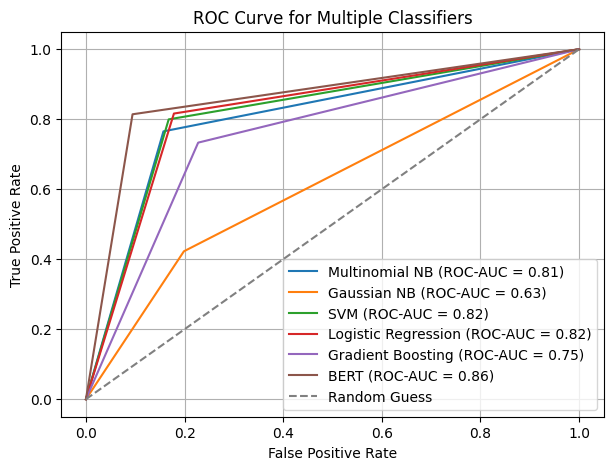

In [132]:
#Multinominal

fpr_multinomial_nb , tpr_multinomial_nb , threshholds_multinominal = roc_curve(y_test,pred_multinomial)
fpr_gaussian_nb, tpr_gaussian_nb, thresholds_gaussian = roc_curve(y_test, pred_gaussian)

fpr_svm , tpr_svm  , threshholds_svm  = roc_curve(y_test,svm_pred)


fpr_logistic_regression , tpr_logistic_regression , threshholds_lr = roc_curve(y_test,lr_pred)
fpr_gradient_boosting , tpr_gradient_boosting , threshholds_gb = roc_curve(y_test,gb_pred)
fpr_bert , tpr_bert , threshholds_bert = roc_curve(y_test,y_pred_labels)

# Plot ROC curves
plt.figure(figsize=(7, 5))
plt.plot(fpr_multinomial_nb, tpr_multinomial_nb, label=f'Multinomial NB (ROC-AUC = {roc_multinominal:.2f})')
plt.plot(fpr_gaussian_nb, tpr_gaussian_nb, label=f'Gaussian NB (ROC-AUC = {roc_gaussian:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (ROC-AUC = {roc_svm:.2f})')
plt.plot(fpr_logistic_regression, tpr_logistic_regression, label=f'Logistic Regression (ROC-AUC = {roc_lr:.2f})')
plt.plot(fpr_gradient_boosting, tpr_gradient_boosting, label=f'Gradient Boosting (ROC-AUC = {roc_gb:.2f})')
plt.plot(fpr_bert, tpr_bert, label=f'BERT (ROC-AUC = {roc_bert:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Classifiers')
plt.legend(loc='lower right')
plt.grid()
plt.show()



In [153]:
roc=[roc_multinominal,roc_gaussian,roc_svm,roc_gb,roc_lr,roc_bert]
accuracy=[accuracy_multinominal,accuracy_gaussian,accuracy_svm,accuracy_gb,accuracy_lr,accuracy_bert]

x=['MultinominalNB','GaussianNB','SVM','Gradient Boosting Classifier','Logistic Regression','BERT']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'MultinominalNB'),
  Text(1, 0, 'GaussianNB'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'Gradient Boosting Classifier'),
  Text(4, 0, 'Logistic Regression'),
  Text(5, 0, 'BERT')])

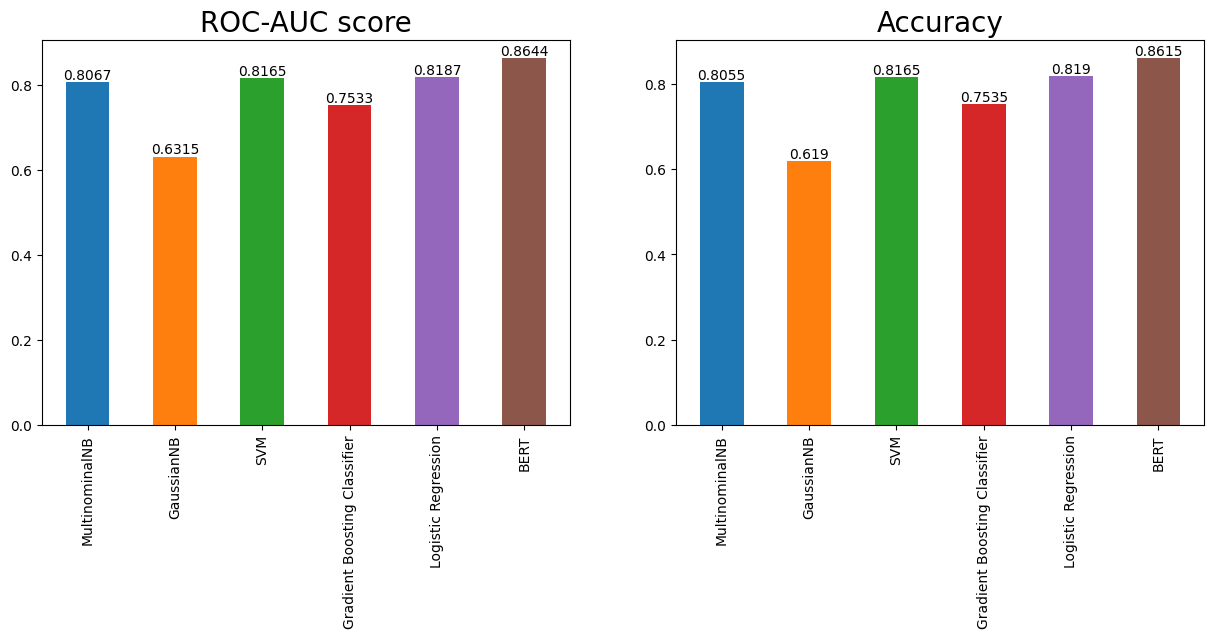

In [154]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(x, roc, width=0.5, color=colors)
plt.title('ROC-AUC score',fontsize=20)
for i, value in enumerate(roc):
    plt.text(i, value, str(round(value, 4)), ha='center', va='bottom')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.bar(x, accuracy, width=0.5, color=colors)
plt.title('Accuracy',fontsize=20)
for i, value in enumerate(accuracy):
    plt.text(i, value, str(round(value, 4)), ha='center', va='bottom')
plt.xticks(rotation=90)

- **In conclusion,**

**BERT** is the most effective model among those evaluated, achieving the highest ROC-AUC score and accuracy for sentiment analysis on the given dataset. It can be considered as the preferred model for future sentiment analysis tasks, as it provides the best performance in distinguishing between positive and negative sentiments.